# Classic ML Model Building Notebook - Word Modeling

## Import Packages

In [1]:
# Audio processing
import librosa
import librosa.display as ld
import IPython.display as ipd
# Data cleaning
import os
import pandas as pd
import numpy as np
from numpy import mean, var
# Data visualization
import matplotlib.pyplot as plt
# Machine learning
import sklearn
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Advanced options
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")
import pickle

--------------

------------------

## Define Constants

In [2]:
FRAMESIZE = 1024
HOPLENGTH = 512
# 13 mels for fingerprint and more than 20 mels for word detection
MELS = 20 
SPLITFREQ = 2000
PCA_N = 2

-------------

----------

## Read Data

In [3]:
df_small_chunk = pd.read_csv('A:\OpenSesame\data\\small_chunk_word.csv')
df_big_chunk = pd.read_csv('A:\OpenSesame\data\\big_chunk_word.csv')

xs_features = np.array(df_small_chunk.iloc[:,:])
xb_features = np.array(df_big_chunk.iloc[:,:])
xb_features.shape

(96, 5)

In [4]:
y_features = pd.read_csv('A:\OpenSesame\data\\target_data_word.csv')
y_features = np.array(y_features.iloc[:,:])

In [5]:
best_features_small = list(np.loadtxt(open('A:\OpenSesame\data\\word_features_small.csv'), delimiter=",", dtype='str'))
best_features_big = list(np.loadtxt(open('A:\OpenSesame\data\\word_features_big.csv'), delimiter=",", dtype='str'))
best_features_small

['feature 0', 'feature 2', 'feature 6', 'feature 7', 'feature 9']

In [6]:
xb_features.shape

(96, 5)

------

-----------

## Data Modeling

- We will model the data with those five classifiers:
    - Logistic Regression
    - XGBoost
    - SVM
    - Random Forest 
- And we will model the Big-Chunk-Data vs Small-Chunk-Data and compare between them.

### Hyperparameters Tuning

In [7]:
xs_train, xs_test, y_train, y_test = train_test_split(xs_features, y_features, test_size=0.3)
xb_train, xb_test, y_train, y_test = train_test_split(xb_features, y_features, test_size=0.3)

1- Logistic Regression

In [8]:
# # Small chunk 
# LR = LogisticRegression()
# LRparam_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     'penalty': ['l1', 'l2'],
#     # 'max_iter': list(range(100,800,100)),
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# }
# LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# # fitting the model for grid search 
# LR_search.fit(xs_train , y_train)
# LR_search.best_params_
# # summarize
# print('Mean Accuracy: %.3f' % LR_search.best_score_)
# print('Config: %s' % LR_search.best_params_)

In [9]:
# # Big chunk 
# LR = LogisticRegression()
# LRparam_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     'penalty': ['l1', 'l2'],
#     # 'max_iter': list(range(100,800,100)),
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# }
# LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# # fitting the model for grid search 
# LR_search.fit(xb_train , y_train)
# LR_search.best_params_
# # summarize
# print('Mean Accuracy: %.3f' % LR_search.best_score_)
# print('Config: %s' % LR_search.best_params_)

- LR Hyperparameters:
    - Small-chunk {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
    - Big-chunk {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

-----

2- XGBoost

In [10]:
# # Small chunk
# def random_search_tuning():
#     # define the train set and test set
#     x_train, x_val, y_train, y_val = train_test_split(xs_features, y_features, test_size=0.05)
#     print("Shapes - X_train: ", x_train.shape,
#           ", X_val: ", x_val.shape, ", y_train: ",
#           y_train.shape, ", y_val: ", y_val.shape)

#     params = {'max_depth': [3, 6, 10, 15],
#               'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
#               'subsample': np.arange(0.5, 1.0, 0.1),
#               'colsample_bytree': np.arange(0.5, 1.0, 0.1),
#               'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
#               'n_estimators': [100, 250, 500, 750],
#               'num_class': [10]
#               }

#     xgbclf = XGBClassifier(objective="multi:softmax", tree_method='hist', random_state=0)
#     clf = RandomizedSearchCV(estimator=xgbclf,
#                              param_distributions=params,
#                              scoring='accuracy',
#                              n_iter=25,
#                              n_jobs=4,
#                              verbose=1)

#     clf.fit(x_train, y_train)

#     best_combination = clf.best_params_

#     return best_combination


# best_params = random_search_tuning()
# print("Best hyperparameter combination: ", best_params)

In [11]:
# # Big chunk
# def random_search_tuning():
#     # define the train set and test set
#     x_train, x_val, y_train, y_val = train_test_split(xb_features, y_features, test_size=0.05)
#     print("Shapes - X_train: ", x_train.shape,
#           ", X_val: ", x_val.shape, ", y_train: ",
#           y_train.shape, ", y_val: ", y_val.shape)

#     params = {'max_depth': [3, 6, 10, 15],
#               'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
#               'subsample': np.arange(0.5, 1.0, 0.1),
#               'colsample_bytree': np.arange(0.5, 1.0, 0.1),
#               'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
#               'n_estimators': [100, 250, 500, 750],
#               'num_class': [10]
#               }

#     xgbclf = XGBClassifier(objective="multi:softmax", tree_method='hist', random_state=0)
#     clf = RandomizedSearchCV(estimator=xgbclf,
#                              param_distributions=params,
#                              scoring='accuracy',
#                              n_iter=25,
#                              n_jobs=4,
#                              verbose=1)

#     clf.fit(x_train, y_train)

#     best_combination = clf.best_params_

#     return best_combination


# best_params = random_search_tuning()
# print("Best hyperparameter combination: ", best_params)

- XGBoost Hyperparameters:
    - Small chunk {'subsample': 0.7999999999999999, 'num_class': 10, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8999999999999999}
    - Big chunk {'subsample': 0.7999999999999999, 'num_class': 10, 'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.4, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7999999999999999}

---------

3- SVM

In [12]:
# # Small-chunk
# parameters = {
#     "kernel": ["linear","rbf"],
#     "C":[0.1,1,10]
# }

# svm = SVC()
# cv = GridSearchCV(svm,parameters,cv=5)
# cv.fit(xs_features,y_features) 

# def display(results):
#     print(f'Best parameters are: {results.best_params_}')
#     mean_score = results.cv_results_['mean_test_score']
#     std_score = results.cv_results_['std_test_score']
#     params = results.cv_results_['params']
#     for mean,std,params in tqdm(zip(mean_score,std_score,params)):
#         print(f'{round(mean,2)} + or -{round(std,2)} for the {params}')

# display(cv)

In [13]:
# # Big-chunk
# parameters = {
#     "kernel": ["linear","rbf"],
#     "C":[0.1,1,10]
# }

# svm = SVC()
# cv = GridSearchCV(svm,parameters,cv=5)
# cv.fit(xb_features,y_features) 

# def display(results):
#     print(f'Best parameters are: {results.best_params_}')
#     mean_score = results.cv_results_['mean_test_score']
#     std_score = results.cv_results_['std_test_score']
#     params = results.cv_results_['params']
#     for mean,std,params in tqdm(zip(mean_score,std_score,params)):
#         print(f'{round(mean,2)} + or -{round(std,2)} for the {params}')

# display(cv)

- SVM hyperparameters
    - Small chunk {'C': 10, 'kernel': 'rbf'}
    - Big chunk {'C': 10, 'kernel': 'linear'}

-----

4- Random Forest

In [14]:
# # Small-chunk
# # Number of trees in random forest
# n_estimators = [int(x) for x in range(200,2000,200)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(xs_train, y_train)


# def evaluate(model, test_features, test_labels):
#     y_pred = model.predict(test_features)
#     accuracy = accuracy_score(y_test, y_pred)
#     print (accuracy)
#     print(confusion_matrix(y_test,y_pred))
    

# best_random = rf_random.best_estimator_
# evaluate(best_random, xs_test, y_test)

# print(rf_random.best_params_)

In [15]:
# # Big-chunk
# # Number of trees in random forest
# n_estimators = [int(x) for x in range(200,2000,200)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(xb_train, y_train)


# def evaluate(model, test_features, test_labels):
#     y_pred = model.predict(test_features)
#     accuracy = accuracy_score(y_test, y_pred)
#     print (accuracy)
#     print(confusion_matrix(y_test,y_pred))
    

# best_random = rf_random.best_estimator_
# evaluate(best_random, xb_test, y_test)

# print(rf_random.best_params_)

- Random Forest Hyperparameters
    - {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}
    - Big chunk {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}

--------------

### Model Selection

In [16]:
def train_model(model, x_features, y_features, pca='yes', chunk='small'):
    
    x_train, x_test, y_train, y_test = train_test_split(x_features, y_features, test_size=0.3)
    sc = StandardScaler()
    pca = PCA(n_components = PCA_N)
    
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    
    if pca == 'yes':
        x_train = pca.fit_transform(x_train)
        x_features = pca.fit_transform(x_features)
        x_test = pca.transform(x_test)
    
    model.fit(x_train, y_train.ravel())
    y_pred = model.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, model.predict(x_test))
    score = cross_val_score(model, x_features, y_features, cv=KFold(n_splits=15))
        
    print(f'Model Accuracy = {accuracy}\n Confusion Matrix = {cm} \n Avg Cross Validation Score = {score.mean()}')
    
    return model

#### Small Chunk Data

In [17]:
lrs = LogisticRegression(random_state = 0, C = 0.01, penalty = 'l1', solver = 'liblinear')
xgbs = XGBClassifier(objective="multi:softmax", tree_method='hist', random_state=0, subsample = 0.7999999999999999, num_class = 10, n_estimators = 100, max_depth = 15, learning_rate = 0.1, colsample_bytree = 0.7, colsample_bylevel = 0.8999999999999999)
svms = SVC(C=10, kernel='rbf', random_state = 0)
rfs = RandomForestClassifier(random_state = 0, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=110, bootstrap=True)

In [18]:
# without PCA
print(f"Logistic Regression without PCA \n")
lr_s = train_model(lrs, xs_features, y_features)
     
print('\n')
# with PCA
print(f"Logistic Regression with PCA \n")
lr_s = train_model(lrs, xs_features, y_features, pca='yes')

Logistic Regression without PCA 

Model Accuracy = 0.4827586206896552
 Confusion Matrix = [[14  0]
 [15  0]] 
 Avg Cross Validation Score = 0.6


Logistic Regression with PCA 

Model Accuracy = 0.5172413793103449
 Confusion Matrix = [[15  0]
 [14  0]] 
 Avg Cross Validation Score = 0.6


In [19]:
# without PCA
print(f"XGBoost without PCA \n")
xgb_s = train_model(xgbs, xs_features, y_features)

print('\n')
# with PCA
print(f"XGBoost with PCA \n")
xgb_s = train_model(xgbs, xs_features, y_features, pca='yes')

XGBoost without PCA 

Model Accuracy = 0.6206896551724138
 Confusion Matrix = [[9 7]
 [4 9]] 
 Avg Cross Validation Score = 0.503174603174603


XGBoost with PCA 

Model Accuracy = 0.8275862068965517
 Confusion Matrix = [[13  5]
 [ 0 11]] 
 Avg Cross Validation Score = 0.503174603174603


In [20]:
# without PCA
print(f"SVM without PCA \n")
svm_s = train_model(svms, xs_features, y_features)


print('\n')
# with PCA
print(f"SVM with PCA \n")
svm_s = train_model(svms, xs_features, y_features, pca='yes')

SVM without PCA 

Model Accuracy = 0.6551724137931034
 Confusion Matrix = [[14  5]
 [ 5  5]] 
 Avg Cross Validation Score = 0.5777777777777777


SVM with PCA 

Model Accuracy = 0.7586206896551724
 Confusion Matrix = [[13  2]
 [ 5  9]] 
 Avg Cross Validation Score = 0.5777777777777777


In [21]:
# without PCA
print(f"Random Forest without PCA \n")
rf_s = train_model(rfs, xs_features, y_features)


print('\n')
# with PCA
print(f"Random Forest with PCA \n")
rf_s = train_model(rfs, xs_features, y_features, pca='yes')

Random Forest without PCA 

Model Accuracy = 0.6551724137931034
 Confusion Matrix = [[ 9  4]
 [ 6 10]] 
 Avg Cross Validation Score = 0.5380952380952381


Random Forest with PCA 

Model Accuracy = 0.6896551724137931
 Confusion Matrix = [[10  5]
 [ 4 10]] 
 Avg Cross Validation Score = 0.5380952380952381


#### Big Chunk Data

In [22]:
lrb = LogisticRegression(random_state = 0, C = 0.1, penalty = 'l2', solver = 'newton-cg')
xgbb = XGBClassifier(objective="multi:softmax", tree_method='hist', random_state=0, subsample = 0.7999999999999999, num_class = 10, n_estimators = 250, max_depth = 10, learning_rate = 0.4, colsample_bytree = 0.8999999999999999, colsample_bylevel = 0.7999999999999999)
svmb = SVC(C=10, kernel='linear', random_state = 0)
rfb = RandomForestClassifier(random_state = 0, n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=70, bootstrap=True)

In [23]:
# without PCA
print(f"Logistic Regression without PCA \n")
lr_b = train_model(lrb, xb_features, y_features, chunk='big')
     
print('\n')
# with PCA
print(f"Logistic Regression with PCA \n")
lr_b = train_model(lrb, xb_features, y_features, pca='yes', chunk='big')

Logistic Regression without PCA 

Model Accuracy = 0.6896551724137931
 Confusion Matrix = [[14  3]
 [ 6  6]] 
 Avg Cross Validation Score = 0.5857142857142856


Logistic Regression with PCA 

Model Accuracy = 0.6206896551724138
 Confusion Matrix = [[14  5]
 [ 6  4]] 
 Avg Cross Validation Score = 0.5857142857142856


In [24]:
# without PCA
print(f"XGBoost without PCA \n")
xgb_b = train_model(xgbb, xb_features, y_features, chunk='big')

print('\n')
# with PCA
print(f"XGBoost with PCA \n")
xgb_b = train_model(xgbb, xb_features, y_features, pca='yes', chunk='big')

XGBoost without PCA 

Model Accuracy = 0.6551724137931034
 Confusion Matrix = [[12  3]
 [ 7  7]] 
 Avg Cross Validation Score = 0.5507936507936508


XGBoost with PCA 

Model Accuracy = 0.6206896551724138
 Confusion Matrix = [[10  3]
 [ 8  8]] 
 Avg Cross Validation Score = 0.5507936507936508


In [25]:
# without PCA
print(f"SVM without PCA \n")
svm_b = train_model(svmb, xb_features, y_features, chunk='big')


print('\n')
# with PCA
print(f"SVM with PCA \n")
svm_b = train_model(svmb, xb_features, y_features, pca='yes', chunk='big')

SVM without PCA 

Model Accuracy = 0.5862068965517241
 Confusion Matrix = [[14  5]
 [ 7  3]] 
 Avg Cross Validation Score = 0.6396825396825395


SVM with PCA 

Model Accuracy = 0.6551724137931034
 Confusion Matrix = [[13  2]
 [ 8  6]] 
 Avg Cross Validation Score = 0.6396825396825395


In [26]:
# without PCA
print(f"Random Forest without PCA \n")
rf_b = train_model(rfb, xb_features, y_features, chunk='big')


print('\n')
# with PCA
print(f"Random Forest with PCA \n")
rf_b = train_model(rfb, xb_features, y_features, pca='yes', chunk='big')

Random Forest without PCA 

Model Accuracy = 0.6206896551724138
 Confusion Matrix = [[12  6]
 [ 5  6]] 
 Avg Cross Validation Score = 0.5555555555555556


Random Forest with PCA 

Model Accuracy = 0.7931034482758621
 Confusion Matrix = [[14  2]
 [ 4  9]] 
 Avg Cross Validation Score = 0.5555555555555556


---------

### Model Building

- As the best model is the Small-chunk-PCA-XGBoost model

Implementation and a little visualization to see our XGBoost Model

In [27]:
# Split big-chunk-data into (70%) train data and (30%) test data
xb_train, xb_test, y_train, y_test = train_test_split(xs_features, y_features, test_size=0.3)

In [28]:
# performing preprocessing part
sc = StandardScaler()
  
xs_train = sc.fit_transform(xs_train)
xs_test = sc.transform(xs_test)

xb_train = sc.fit_transform(xb_train)
xb_test = sc.transform(xb_test)

# print(xs_train.shape)
# print(xb_train.shape)

#-----------------------------------------------

pca = PCA(n_components = PCA_N)
xs_train_pca = pca.fit_transform(xs_train)
xs_test_pca = pca.transform(xs_test)

xb_train_pca = pca.fit_transform(xb_train)
xb_test_pca = pca.transform(xb_test)

In [29]:
# classifier = XGBClassifier(objective="multi:softmax", tree_method='hist', random_state=0, subsample = 0.7999999999999999, num_class = 10, n_estimators = 100, max_depth = 15, learning_rate = 0.1, colsample_bytree = 0.7, colsample_bylevel = 0.8999999999999999)
# # classifier = LogisticRegression(random_state = 0, C = 0.1, penalty = 'l2', solver = 'newton-cg')
# # classifier = RandomForestClassifier(random_state = 0, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=110, bootstrap=True)
# # classifier = SVC(C=10, kernel='linear', random_state = 0)
# classifier.fit(xb_train_pca, y_train)
# classifier

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.8999999999999999, colsample_bynode=1,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=15, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=10, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0, ...)

In [ ]:
classifier_path = 'models\\xgb_word.json'

classifier = XGBClassifier()
classifier.load_model(classifier_path)

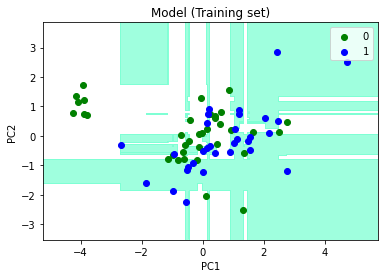

In [30]:
# Predicting the training set
# result through scatter plot 
from matplotlib.colors import ListedColormap
  
X_set, y_set = xb_train_pca, y_train[:,0]
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('white', 'aquamarine')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('green', 'blue'))(i), label = j)
  
plt.title('Model (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
  
# show scatter plot
plt.show()

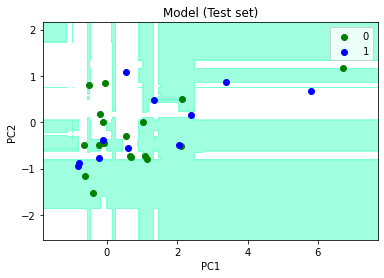

In [31]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = xb_test_pca, y_test[:,0]
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('white', 'aquamarine',))) 
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('green', 'blue',))(i), label = j)
  
# title for scatter plot
plt.title('Model (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
  
# show scatter plot
plt.show()

------------

### Model verification

In [32]:
# Functions we will use
def transform_audio(audio, FRAMESIZE, HOPLENGTH, MELS, SPLITFREQ):
    
    audio_array, sr = librosa.load(audio)
    ae_audio = fancy_amplitude_envelope(audio_array, FRAMESIZE, HOPLENGTH)
    rms_audio = librosa.feature.rms(audio_array, frame_length=FRAMESIZE, hop_length=HOPLENGTH)[0]
    mel_audio = librosa.feature.melspectrogram(audio_array, sr=sr, n_fft=FRAMESIZE, hop_length=HOPLENGTH, n_mels=MELS)
    log_mel_audio = librosa.power_to_db(mel_audio)[0]
    mfccs_audio = librosa.feature.mfcc(y=audio_array, n_mfcc=MELS, sr=sr, n_fft=FRAMESIZE, hop_length=HOPLENGTH)[0]
    sc_audio = librosa.feature.spectral_centroid(y=audio_array, sr=sr, n_fft=FRAMESIZE, hop_length=HOPLENGTH)[0]
    chromagram_audio = librosa.feature.chroma_stft(audio_array, sr=sr, n_fft=FRAMESIZE, hop_length=HOPLENGTH)[0]
    tone_audio = librosa.feature.tonnetz(y=audio_array, sr=sr)[0]
    
#     return np.hstack((log_mel_audio, mfccs_audio, sc_audio, rms_audio, ae_audio, chromagram_audio, tone_audio))
    return np.hstack((mean(log_mel_audio), var(log_mel_audio), mean(mfccs_audio), var(mfccs_audio), mean(sc_audio), var(sc_audio), mean(ae_audio), var(ae_audio), mean(chromagram_audio), var(chromagram_audio), mean(tone_audio), var(tone_audio)))


def fancy_amplitude_envelope(signal, framesize, hoplength):
    return np.array([max(signal[i:i+framesize]) for i in range(0, len(signal), hoplength)])

In [33]:
x_ver_features = []
for x in best_features_big:
    x_ver_features.append(int(x.split(' ')[1]))
x_ver_features

# x_ver_features = []
# for x in best_features_small:
#     x_ver_features.append(int(x.split(' ')[1]))
# x_ver_features

[0, 2, 7, 8, 9]

In [34]:
# Functions we will use
def transform_audio(audio, FRAMESIZE, HOPLENGTH, MELS, SPLITFREQ):
    
    audio_array, sr = librosa.load(audio)
    ae_audio = fancy_amplitude_envelope(audio_array, FRAMESIZE, HOPLENGTH)
    rms_audio = librosa.feature.rms(audio_array, frame_length=FRAMESIZE, hop_length=HOPLENGTH)[0]
    mel_audio = librosa.feature.melspectrogram(audio_array, sr=sr, n_fft=FRAMESIZE, hop_length=HOPLENGTH, n_mels=MELS)
    log_mel_audio = librosa.power_to_db(mel_audio)[0]
    mfccs_audio = librosa.feature.mfcc(y=audio_array, n_mfcc=MELS, sr=sr, n_fft=FRAMESIZE, hop_length=HOPLENGTH)[0]
    sc_audio = librosa.feature.spectral_centroid(y=audio_array, sr=sr, n_fft=FRAMESIZE, hop_length=HOPLENGTH)[0]
    chromagram_audio = librosa.feature.chroma_stft(audio_array, sr=sr, n_fft=FRAMESIZE, hop_length=HOPLENGTH)[0]
    tone_audio = librosa.feature.tonnetz(y=audio_array, sr=sr)[0]
    
#     return np.hstack((log_mel_audio, mfccs_audio, sc_audio, rms_audio, ae_audio, chromagram_audio, tone_audio))
    return np.hstack((mean(log_mel_audio), var(log_mel_audio), mean(mfccs_audio), var(mfccs_audio), mean(sc_audio), var(sc_audio), mean(ae_audio), var(ae_audio), mean(chromagram_audio), var(chromagram_audio), mean(tone_audio), var(tone_audio)))


def fancy_amplitude_envelope(signal, framesize, hoplength):
    return np.array([max(signal[i:i+framesize]) for i in range(0, len(signal), hoplength)])

In [35]:
def test_classifier(path):
    file_paths = f"A:\\Professional\\Engineering CU\\DSP_Data_Verification\\{path}\\"
    for file in os.listdir(file_paths):
        audio = file_paths+file
        x_ver = transform_audio(audio, FRAMESIZE*4, HOPLENGTH*4, MELS, SPLITFREQ) #Big-chunk
        print(x_ver.shape)
        x_ver = x_ver[x_ver_features]
        x_ver = sc.transform(x_ver.reshape(1,-1))
        x_ver = pca.transform(x_ver)[0]
        
        print(file)
        print(classifier.predict(np.array([x_ver[0].ravel(), x_ver[1].ravel()]).T).reshape(x_ver[0].shape))

In [39]:
test_classifier('open the door')

(12,)
ahmed_otd13.wav
1
(12,)
ahmed_otd2.wav
1
(12,)
maha_otd13.wav
1
(12,)
maha_otd14.wav
1
(12,)
mahmoud_otd10.wav
1
(12,)
mahmoud_otd11.wav
1
(12,)
mahmoud_otd12.wav
1
(12,)
mahmoud_otd13.wav
1
(12,)
mahmoud_otd14.wav
1
(12,)
mahmoud_otd9.wav
1


In [37]:
dest = "A:\OpenSesame\models\\"
picklefile = "xgb_word"
# pickle.dump(classifier,open(dest + picklefile+'.pkl','wb'))
classifier.save_model(dest+picklefile+'.json')